Sakshi Kulshreshtha: 16BCE1198

Iris Dataset (using sklearn)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [4]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [6]:
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', 'v')
    colors = ('red', 'blue', 'lightgreen', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', alpha=1.0, linewidth=1, marker='v', s=55, label='test set')

In [8]:
from sklearn.neighbors import KNeighborsClassifier
#p=1: Manhattan distance
knn=KNeighborsClassifier(n_neighbors=5,p=1,metric='manhattan')
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')

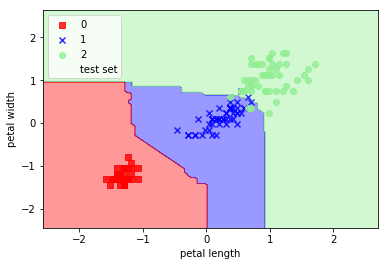

In [9]:
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" %accuracy_score(y_test,knn.predict(X_test_std[0:45,])))

Accuracy: 1.00


In [11]:
from sklearn.neighbors import KNeighborsClassifier
#p=2: Euclidean distance
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

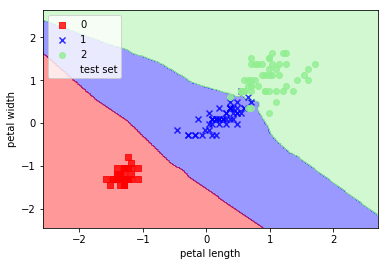

In [12]:
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" %accuracy_score(y_test,knn.predict(X_test_std[0:45,])))

Accuracy: 1.00


In [14]:
from sklearn.neighbors import KNeighborsClassifier
#metric outweighs p. If metric='minkowski', check for 'p'.
knn=KNeighborsClassifier(n_neighbors=5,p=1,metric='minkowski')
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')

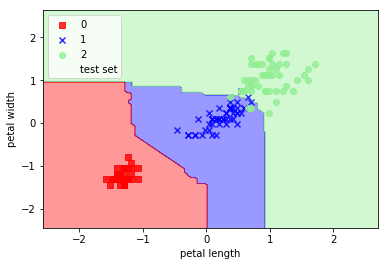

In [15]:
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" %accuracy_score(y_test,knn.predict(X_test_std[0:45,])))

Accuracy: 1.00


In [ ]:
#https://www.fabienplisson.com/finding-the-right-k-in-k-nearest-neighbors/